In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv")
df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [51]:
df.isnull().sum()
#notamos que a coluna do exame 33 possui dados ausentes que devem ser tratados

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [52]:
#como a coluna exame_33 possuir muitos valores faltantes(419 de 569),é interessante dropar a coluna
df = df.drop(columns="exame_33",axis=1)
df.isnull().sum()

id             0
diagnostico    0
exame_1        0
exame_2        0
exame_3        0
exame_4        0
exame_5        0
exame_6        0
exame_7        0
exame_8        0
exame_9        0
exame_10       0
exame_11       0
exame_12       0
exame_13       0
exame_14       0
exame_15       0
exame_16       0
exame_17       0
exame_18       0
exame_19       0
exame_20       0
exame_21       0
exame_22       0
exame_23       0
exame_24       0
exame_25       0
exame_26       0
exame_27       0
exame_28       0
exame_29       0
exame_30       0
exame_31       0
exame_32       0
dtype: int64

In [57]:
#montaremos um modelo inicial com todas as features,para ter um base do valor do score
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=100)
#divisao de dados de treino e teste
y = df["diagnostico"]
x = df.drop(columns=["diagnostico","id"],axis=1)

In [58]:
SEED = 123143
np.random.seed(SEED)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=SEED)

In [59]:
modelo.fit(x_train,y_train)
print(modelo.score(x_test,y_test))
#91,81% é o nosso valor base para a redução de dimesionalidade

0.9181286549707602


In [61]:
df_plot = df.drop(columns="id",axis=1)
df_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [62]:
df_plot["diagnostico"].unique()

array(['M', 'B'], dtype=object)

In [63]:
#usaremos o metodo melt na coluna diagnostico para criar uma nova separaçao
#quando chamamos df.melt nao devemos passar o df como argumento
df_plot = df_plot.melt(id_vars=["diagnostico"],var_name="exame",value_name="valores")
df_plot.head()

,diagnostico,exame,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


In [64]:
#notamos que os intervalos de valores que cada exame varia são muito diferentes
#o que dificulta a visualização,logo vamos usar o standardscaler para termos dados de mesma escala
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#queremos aplicar a transformação de escala para os valores de exames apenas
df_exame = df.drop(columns=["diagnostico","id"],axis=1)
scaler.fit(df_exame)
padronizado = scaler.transform(df_exame)
padronizado.shape
#como o retorno é um np array,devemos transformar em dataframe para conseguir gerar os dados

(569, 32)

In [65]:
colunas = []
for i in range(1,33):
    colunas.append(f'exame_{i}')
df_padronizado = pd.DataFrame(padronizado,columns=colunas)
df_padronizado.head()
#agora,plotaremos separadamente partes do df

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100


In [92]:
df_auxiliar = df[["diagnostico"]]
recorte_1 = df_padronizado.iloc[:, :10]
recorte_2 = df_padronizado.iloc[:, 10:21]
recorte_3 = df_padronizado.iloc[:, 21:]
#precisamos concatenar os recortes com o dataframe que possuir a coluna diagnostico

In [94]:
recorte_1 = pd.concat([df_auxiliar,recorte_1],axis=1)
recorte_1.head(2)

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10
0,M,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515
1,M,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392


In [95]:
recorte_2 = pd.concat([df_auxiliar,recorte_2],axis=1)
recorte_2.head(2)

,diagnostico,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21
0,M,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083
1,M,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444


In [96]:
recorte_3 = pd.concat([df_auxiliar,recorte_3],axis=1)
recorte_3

,diagnostico,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,M,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,M,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,M,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,M,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.110223e-16,1.629151,-1.360158,-0.709091
565,M,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,1.110223e-16,0.733827,-0.531855,-0.973978
566,M,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,1.110223e-16,0.414069,-1.104549,-0.318409
567,M,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,1.110223e-16,2.289985,1.919083,2.219635


In [97]:
#agora precisamos deixar os recortes no formato adequado para a visualizaçao
#transformaremos cada um dos recortes usando a função melt
plot_1 = recorte_1.melt(id_vars=["diagnostico"],var_name="exame",value_name="valores")
plot_1.head()

,diagnostico,exame,valores
0,M,exame_1,1.097064
1,M,exame_1,1.829821
2,M,exame_1,1.579888
3,M,exame_1,-0.768909
4,M,exame_1,1.750297


In [99]:
plot_2 = recorte_2.melt(id_vars=["diagnostico"],var_name="exame",value_name="valores")
plot_2.head()

,diagnostico,exame,valores
0,M,exame_11,2.255747
1,M,exame_11,-0.868652
2,M,exame_11,-0.398008
3,M,exame_11,4.910919
4,M,exame_11,-0.562450


In [101]:
plot_3 = recorte_3.melt(id_vars=["diagnostico"],var_name="exame",value_name="valores")
plot_3.head()

,diagnostico,exame,valores
0,M,exame_22,1.886690
1,M,exame_22,1.805927
2,M,exame_22,1.511870
3,M,exame_22,-0.281464
4,M,exame_22,1.298575


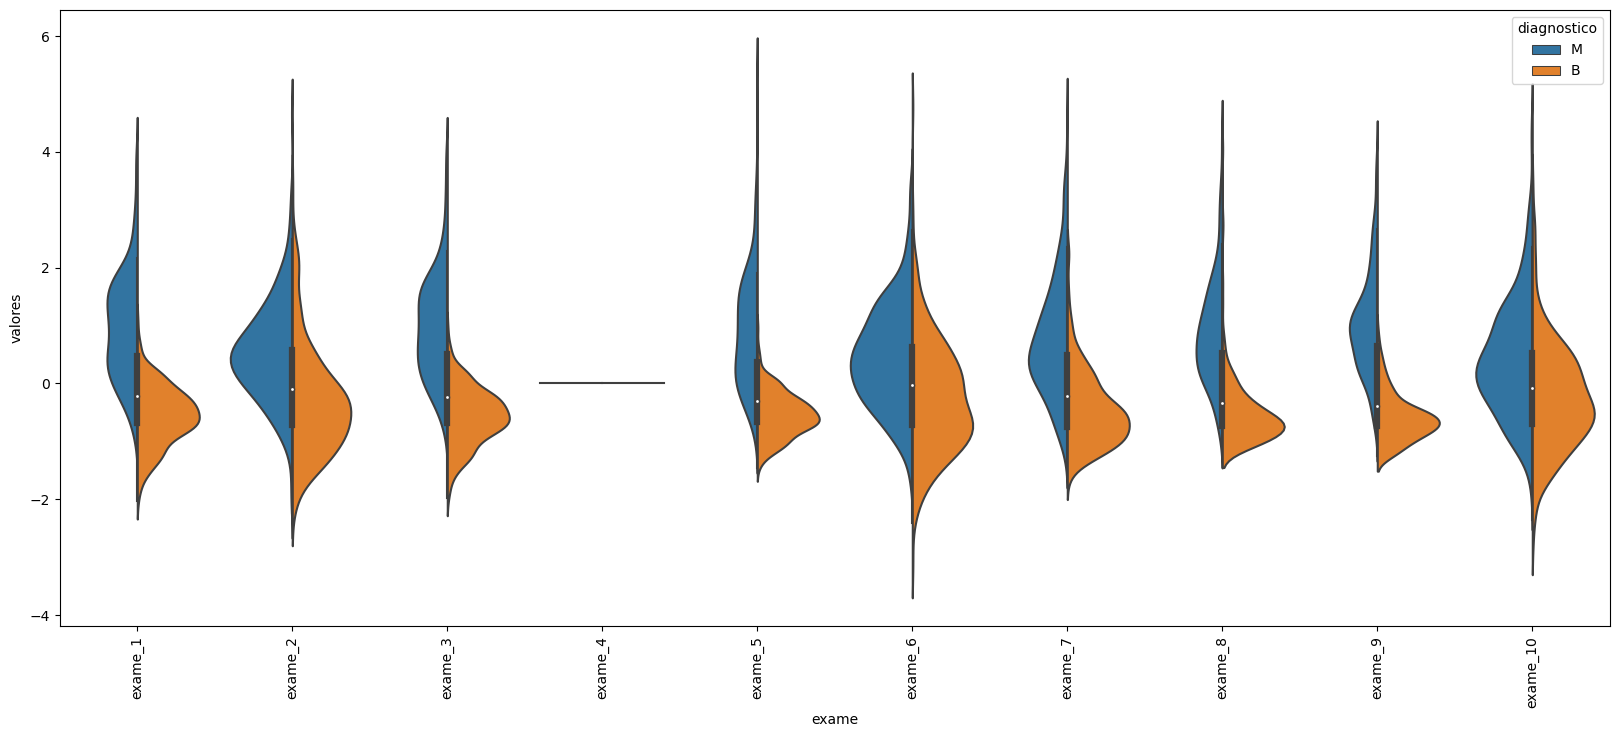

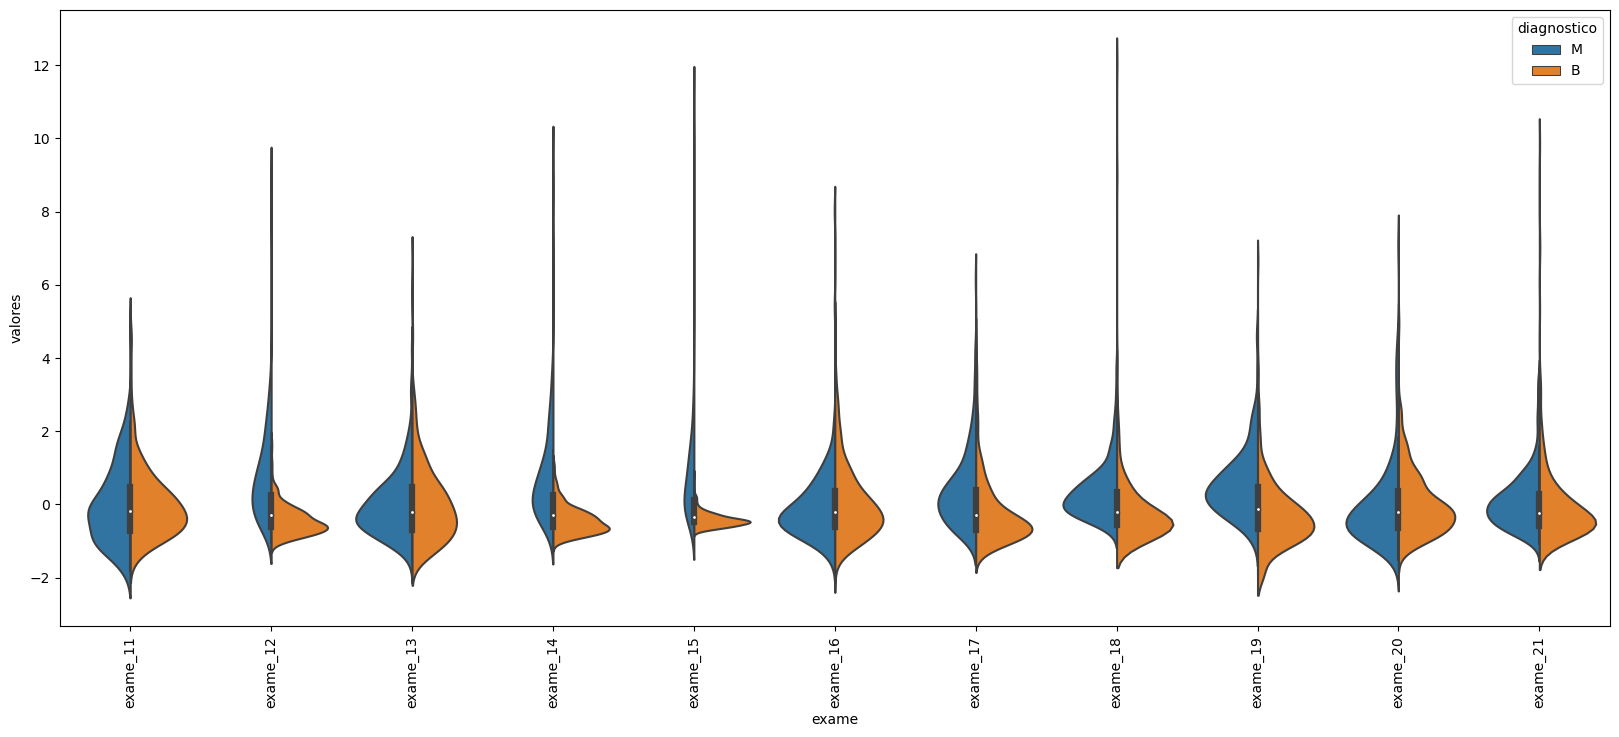

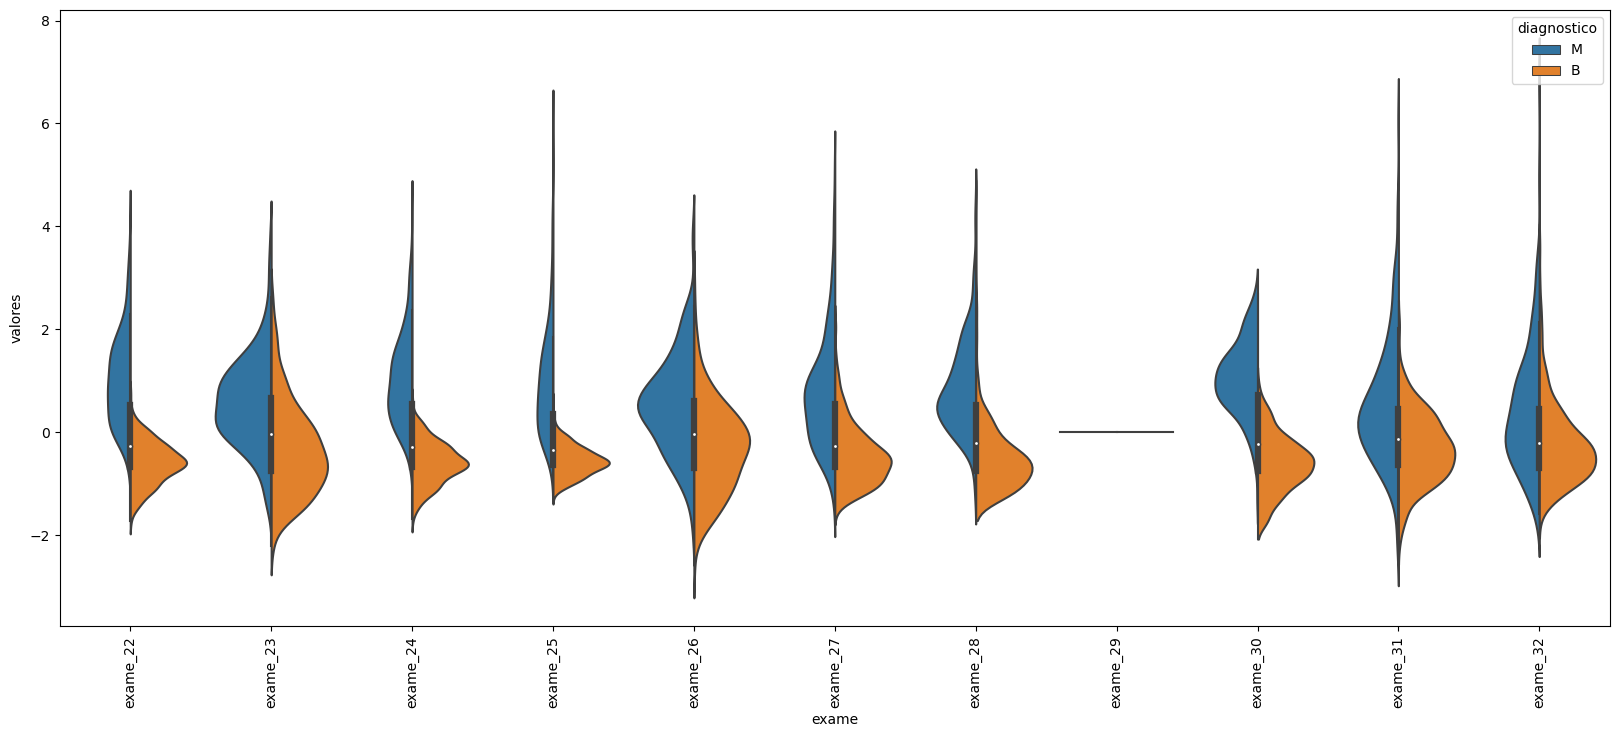

In [103]:
plots = [plot_1,plot_2,plot_3]
for plot in plots:
    plt.figure(figsize=(20,8))
    sns.violinplot(data=plot,x="exame",y="valores",hue="diagnostico",split=True)
    plt.xticks(rotation=90)
    plt.show()

In [105]:
#analisando valores constantes
recorte_1["exame_4"].unique()

array([1.42108547e-14])

In [106]:
recorte_3["exame_29"].unique()

array([1.11022302e-16])

In [107]:
df_filtrado = df.drop(columns=["exame_4","exame_29"],axis=1)

In [ ]:
#utilizaremos de uma analise de correlação para identificar as variaveis altamente
#correlacionadas,e eliminaremos tais colunas,deixando somente uma